# **Import Necessary Libraries**

In [1]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm
from matplotlib.image import imread
from sklearn.model_selection import train_test_split
from keras import optimizers
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

In [2]:
image_test = ('/content/Kaggle-planet-test-tif.torrent')
image_train = ('/content/Kaggle-planet-train-tif.torrent')
train_data = pd.read_csv('/content/train_v2.csv')
test_data = pd.read_csv('/content/sample_submission_v2.csv')

print(test_data.shape)
print(train_data.shape)


(61191, 2)
(40479, 2)


In [3]:
train_data.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [4]:
test_data.head()

,image_name,tags
0,test_0,primary clear agriculture road water
1,test_1,primary clear agriculture road water
2,test_2,primary clear agriculture road water
3,test_3,primary clear agriculture road water
4,test_4,primary clear agriculture road water


In [5]:
# number of unique classes in the train dataset
train_data['tags'].nunique()

449

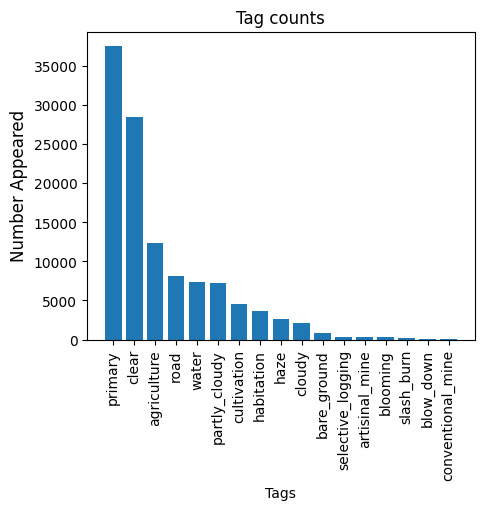

In [10]:
# Tags in the dataset
no_tags = train_data['tags'].apply(lambda x: x.split(' '))
no_tags = [item for sublist in no_tags for item in sublist]
tag_counts = pd.Series(no_tags).value_counts()

plt.figure(figsize=(5,4))
plt.bar(tag_counts.index, tag_counts.values, alpha=1)
plt.xticks(rotation=90)
plt.title('Tag counts')
plt.ylabel('Number Appeared', fontsize=12)
plt.xlabel('Tags')
plt.xticks(rotation=90)
plt.show();

In [12]:
labels = set()
def splitting_tags(tags):
    [labels.add(tag) for tag in tags.split()]

train_df1 = train_data.copy()
train_df1['tags'].apply(splitting_tags)
labels = list(labels)
print(labels)

['conventional_mine', 'bare_ground', 'blooming', 'agriculture', 'clear', 'water', 'habitation', 'cultivation', 'artisinal_mine', 'primary', 'selective_logging', 'slash_burn', 'blow_down', 'haze', 'partly_cloudy', 'road', 'cloudy']


In [13]:
for tag in labels:
    train_df1[tag] = train_df1['tags'].apply(lambda x: 1 if tag in x.split() else 0)
train_df1['image_name'] = train_df1['image_name'].apply(lambda x: '{}.jpg'.format(x))
train_df1.head()

,image_name,tags,conventional_mine,bare_ground,blooming,agriculture,clear,water,habitation,cultivation,artisinal_mine,primary,selective_logging,slash_burn,blow_down,haze,partly_cloudy,road,cloudy
0,train_0.jpg,haze primary,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,train_1.jpg,agriculture clear primary water,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0
2,train_2.jpg,clear primary,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,train_3.jpg,clear primary,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,train_4.jpg,agriculture clear habitation primary road,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0


In [17]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3),  activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3),  activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=256, kernel_size=(3, 3),  activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=512, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(units=17, activation='sigmoid'))
    model.compile(optimizer=Adam(lr=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [18]:
#initialize the model
model = cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [26]:
train_df1.to_csv('submission2.csv', index = False)